# Part 1 importing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('employee_retention_data.csv')

In [3]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [6]:
import datetime
data = data[data['seniority'] < 40]
d = datetime.date(2011,1,23)
delta = datetime.timedelta(days=1)
all_days = []
while d <= datetime.date(2015,12,13):
    all_days.append(d.strftime("%Y-%m-%d"))
    d += delta

In [7]:
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [8]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [9]:
comp_id_unique = sorted(data['company_id'].unique())

In [10]:
comp_id_unique

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Creating table

In [11]:
df = pd.DataFrame()

#for comps in comp_id_unique:
for days in all_days:
    days = datetime.datetime.strptime(days,'%Y-%m-%d')
    new_data = data[(data['join_date'] <= days) | (data['quit_date'] >= days)].groupby(['company_id']).size().reset_index(name='count')
    i = 1
    for index, row in new_data.iterrows():
        while (i != row['company_id']):
            df = df.append({'day': days, 'employee_headcount': 0,'company_id':i}, ignore_index=True)
            i = i + 1
        df = df.append({'day': days, 'employee_headcount': row['count'],'company_id':row['company_id']}, ignore_index=True)
        i = i + 1

In [12]:
df.head(10)

,company_id,day,employee_headcount
0,1.0,2011-01-23,4620.0
1,2.0,2011-01-23,2206.0
2,3.0,2011-01-23,1531.0
3,4.0,2011-01-23,1153.0
4,5.0,2011-01-23,983.0
5,6.0,2011-01-23,712.0
6,7.0,2011-01-23,692.0
7,8.0,2011-01-23,579.0
8,9.0,2011-01-23,529.0
9,10.0,2011-01-23,479.0


Cumulative Distribution of employees

company_id
1.0     Axes(0.125,0.125;0.775x0.775)
2.0     Axes(0.125,0.125;0.775x0.775)
3.0     Axes(0.125,0.125;0.775x0.775)
4.0     Axes(0.125,0.125;0.775x0.775)
5.0     Axes(0.125,0.125;0.775x0.775)
6.0     Axes(0.125,0.125;0.775x0.775)
7.0     Axes(0.125,0.125;0.775x0.775)
8.0     Axes(0.125,0.125;0.775x0.775)
9.0     Axes(0.125,0.125;0.775x0.775)
10.0    Axes(0.125,0.125;0.775x0.775)
11.0    Axes(0.125,0.125;0.775x0.775)
12.0    Axes(0.125,0.125;0.775x0.775)
Name: employee_headcount, dtype: object

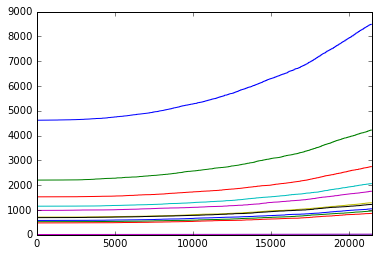

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('company_id')['employee_headcount'].plot()

In [15]:
#Remove NA values
data.dropna(inplace = True)
data['employment_length'] = (data['quit_date'] - data['join_date'])/ np.timedelta64(1, 'D')


#  Part 2 Graphing Distribution of employment

### Companies

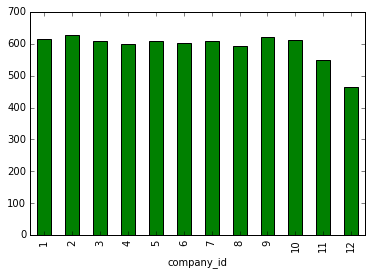

In [33]:
data.groupby('company_id')['employment_length'].mean().plot(kind='bar', color='green')

### Salary

In [19]:
max(data['salary'])

379000.0

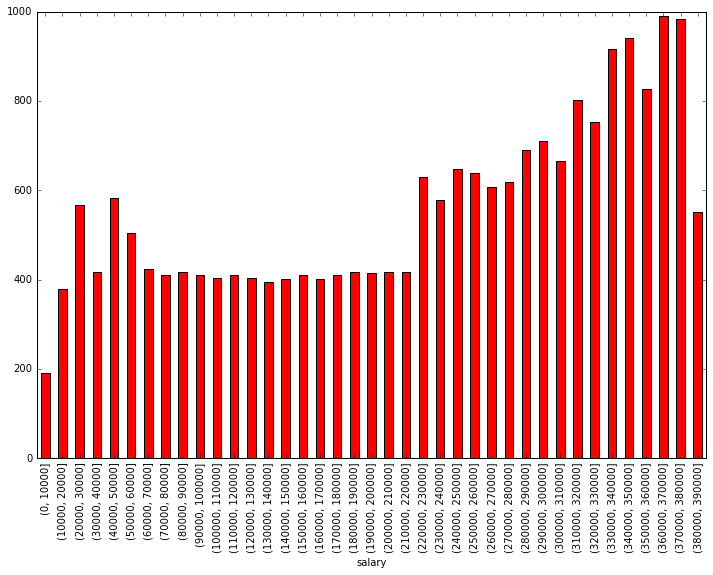

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
salary_range = pd.cut(data['salary'], range(0,400000, 10000))
data.groupby(salary_range)['employment_length'].median().plot(kind='bar',color='red')

No apparent trends in department, seniority. But companies 11 and 12 have low employment rate and also mid salary range employees quit more than low or high salary employees.

Lot of employees quit after 1st or 2nd or 3rd year. Employees usually wait for a bump in salart before quitting.

## Employee churn prediction by decision tree regressor

In [24]:
data.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'employment_length'],
      dtype='object')

# Part 3 Modelling

In [25]:
data['dept_n'] = pd.factorize(data['dept'])[0]

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import pydotplus
from IPython.display import Image  

cols = ['company_id', 'dept_n', 'seniority', 'salary']

X = data[cols]
Y = data['employment_length']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20)
dtr = DecisionTreeRegressor(criterion='mae',random_state=20,max_depth = 3)
dtr.fit(X_train,y_train)
print("Test r^2 score: ",dtr.score(X_test,y_test))
y_test_pred = dtr.predict(X_test)
print("prediction rate: ", sum(y_test==y_test_pred) / len(y_test))

Test r^2 score:  -0.264064093638
prediction rate:  0.00370096225019
[ 0.          0.          0.03871168  0.96128832]
